In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances 

In [75]:
data = pd.read_csv('iris.csv')
data.drop(columns=['Id', 'Species'], axis=1, inplace=True)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [76]:
def single_linkage(cutoff,distance_matrix,df):
    d = {} 
    for i in range(0,cutoff):
        ij_min = np.unravel_index(distance_matrix.argmin(), distance_matrix.shape) 
        if i == 0:
            df.iloc[ij_min[0]] = 0
            df.iloc[ij_min[1]] = 0
        else:
            try:
                a = int(df.iloc[ij_min[0]])
            except:
                df.iloc[ij_min[0]] = i
                a = i
            try:
                b = int(df.iloc[ij_min[1]])
            except:
                df.iloc[ij_min[1]] = i
                b = i
            df[(df[0]==a) | (df[0]==b)] = i
        d[i] = ij_min
        
        for j in range(0, ij_min[0]):    
            if np.isfinite(distance_matrix[ij_min[0]][j]) and np.isfinite(distance_matrix[ij_min[1]][j]):
                distance_matrix[ij_min[1]][j] = min(distance_matrix[ij_min[0]][j], distance_matrix[ij_min[1]][j])
        
        distance_matrix[ij_min[0]] = np.inf
    return d, df[0].to_numpy()

In [77]:
def complete_linkage(cutoff,distance_matrix,df):
    d_complete = {}
    for i in range(0,cutoff):
        ij_min = np.unravel_index(distance_matrix.argmin(), distance_matrix.shape)
        if i == 0:
            df.iloc[ij_min[0]] = 0
            df.iloc[ij_min[1]] = 0
        else:
            try:
                a = int(df.iloc[ij_min[0]])
            except:
                df.iloc[ij_min[0]] = i
                a = i
            try:
                b = int(df.iloc[ij_min[1]])
            except:
                df.iloc[ij_min[1]] = i
                b = i
            df[(df[0]==a) | (df[0]==b)] = i
        d_complete[i] = ij_min
        for j in range(0, ij_min[0]):
            if np.isfinite(distance_matrix[ij_min[0]][j]) and np.isfinite(distance_matrix[ij_min[1]][j]):
                
                distance_matrix[ij_min[1]][j] = max(distance_matrix[ij_min[0]][j], distance_matrix[ij_min[1]][j])
        distance_matrix[ij_min[0]] = np.inf
    return d_complete, df[0].to_numpy()

In [78]:
def average_linkage(cutoff,distance_matrix,df):
    d_average = {}
    for i in range(0,cutoff):
        ij_min = np.unravel_index(distance_matrix.argmin(), distance_matrix.shape)
        if i == 0:
            df.iloc[ij_min[0]] = 0
            df.iloc[ij_min[1]] = 0
        else:
            try:
                a = int(df.iloc[ij_min[0]])
            except:
                df.iloc[ij_min[0]] = i
                a = i
            try:
                b = int(df.iloc[ij_min[1]])
            except:
                df.iloc[ij_min[1]] = i
                b = i
            df[(df[0]==a) | (df[0]==b)] = i
        d_average[i] = ij_min
        for j in range(0, ij_min[0]):
            if np.isfinite(distance_matrix[ij_min[0]][j]) and np.isfinite(distance_matrix[ij_min[1]][j]):
                
                distance_matrix[ij_min[1]][j] = (distance_matrix[ij_min[0]][j] + distance_matrix[ij_min[1]][j])/2.0          
        distance_matrix[ij_min[0]] = np.inf
    return d_average, df[0].to_numpy()

In [79]:
def AHC(data, cutoff, linkage):
    distance_matrix = euclidean_distances(data, data) 
    distance_matrix = np.tril(distance_matrix) 
    distance_matrix[distance_matrix == 0] = np.inf 
    df = pd.DataFrame(data=np.ones(data.shape[0])*np.inf) 
    if cutoff > distance_matrix.shape[0]: 
        cutoff = distance_matrix.shape[0]
    if linkage == 1: 
       return single_linkage(cutoff,distance_matrix,df)
    elif linkage == 2:
        return complete_linkage(cutoff,distance_matrix,df)
    elif linkage == 3:
        return average_linkage(cutoff,distance_matrix,df)

In [80]:
iris_data = np.array(data)
data_set, target = AHC(iris_data,147,1) # for single_linkage
# data_set, target = AHC(iris_data, 147,2) # for single_linkage
# data_set, target = AHC(iris_data, 147,3) # for single_linkage

In [81]:
data_set

{0: (39, 7),
 1: (132, 128),
 2: (17, 0),
 3: (48, 10),
 4: (91, 63),
 5: (92, 82),
 6: (96, 95),
 7: (4, 0),
 8: (7, 0),
 9: (28, 0),
 10: (40, 17),
 11: (47, 3),
 12: (81, 80),
 13: (137, 116),
 14: (3, 2),
 15: (12, 1),
 16: (21, 19),
 17: (38, 8),
 18: (46, 19),
 19: (49, 7),
 20: (27, 0),
 21: (30, 29),
 22: (45, 1),
 23: (75, 65),
 24: (93, 57),
 25: (99, 96),
 26: (138, 127),
 27: (9, 1),
 28: (29, 9),
 29: (34, 1),
 30: (37, 1),
 31: (95, 88),
 32: (80, 69),
 33: (126, 123),
 34: (139, 112),
 35: (26, 23),
 36: (42, 38),
 37: (89, 53),
 38: (25, 9),
 39: (97, 74),
 40: (84, 66),
 41: (143, 120),
 42: (73, 63),
 43: (127, 70),
 44: (11, 7),
 45: (43, 26),
 46: (147, 110),
 47: (23, 7),
 48: (82, 67),
 49: (116, 103),
 50: (19, 17),
 51: (58, 54),
 52: (65, 58),
 53: (78, 63),
 54: (145, 141),
 55: (146, 123),
 56: (148, 136),
 57: (144, 140),
 58: (94, 90),
 59: (87, 68),
 60: (122, 105),
 61: (140, 120),
 62: (6, 2),
 63: (52, 50),
 64: (56, 51),
 65: (113, 101),
 66: (130, 107

In [82]:
target

array([140., 140., 140., 140., 140., 140., 140., 140., 140., 140., 140.,
       140., 140., 140., 140., 140., 140., 140., 140., 140., 140., 140.,
       140., 140., 140., 140., 140., 140., 140., 140., 140., 140., 140.,
       140., 140., 140., 140., 140., 140., 140., 140., 140., 140., 140.,
       140., 140., 140., 140., 140., 140., 146., 146., 146., 144., 146.,
       146., 146., 144., 146., 144., 144., 146., 144., 146., 144., 146.,
       146., 144., 144., 144., 146., 146., 146., 146., 146., 146., 146.,
       146., 146., 144., 144., 144., 144., 146., 146., 146., 146., 144.,
       146., 144., 144., 146., 144., 144., 144., 146., 146., 146., 144.,
       146., 146., 146., 146., 146., 146., 146., 146., 146., 146., 146.,
       146., 146., 146., 146., 146., 146., 146., 146., 146., 146., 146.,
       146., 146., 146., 146., 146., 146., 146., 146., 146., 146., 146.,
       146., 146., 146., 146., 146., 146., 146., 146., 146., 146., 146.,
       146., 146., 146., 146., 146., 146., 146.])

In [83]:
target[target == 140] = 0
target[target == 144] = 1
target[target == 146] = 2

In [84]:
target

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2.,
       2., 2., 1., 2., 2., 2., 1., 2., 1., 1., 2., 1., 2., 1., 2., 2., 1.,
       1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 2., 2.,
       2., 2., 1., 2., 1., 1., 2., 1., 1., 1., 2., 2., 2., 1., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

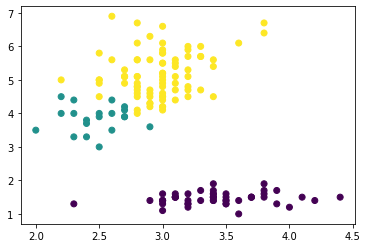

In [85]:
plt.scatter(iris_data[:,1], iris_data[:,2], c=target)
plt.show()

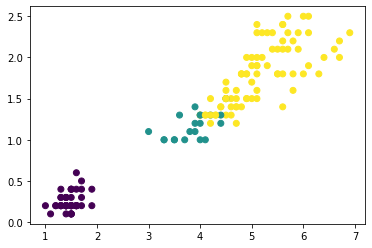

In [86]:
plt.scatter(iris_data[:,2], iris_data[:,3], c=target)
plt.show()

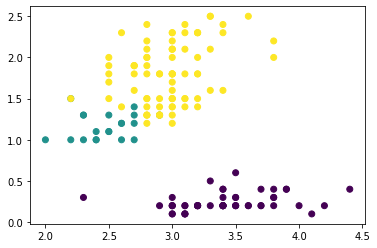

In [87]:
plt.scatter(iris_data[:,1], iris_data[:,3], c=target)
plt.show()